In [1]:
import requests,json,random
# random reqId generator for post req get_approaching_veichles()
def s4():
    return ''.join([random.choice('0123456789abcdef') for x in range(4)])
def guid():
    return s4()+s4()+'-'+s4()+'-'+s4()+'-'+s4()+s4()+s4()

#req header 
headers={'content-type': 'application/json','accept':'application/json'}


class api:
    def __init__(self):
        self.baseurl="http://167.114.174.89:8080/"
        self.baseurl_tp="http://167.114.174.89:2080/"
        self.req_id=""
        self.stops=self.get_all_stoppages()["data"]
        print 'in'
        
    #utility
    def get_stop_id_by_name(self,stop_name):
        for stop in self.stops:
            if stop["stopName"]==stop_name:
                return stop["stopId"]
        return "0"
    
    # Get req working all
    def get_all_routes(self):
        r = requests.get(self.baseurl+"app/routes/getAllRoutes.json")
        return json.loads(r.text)
        
    def get_all_stoppages(self):
        r = requests.get(self.baseurl+"app/stops/getAllStops.json")
        return json.loads(r.text)
        
    def get_last_update_time(self):
        r = requests.get(self.baseurl+"app/routes/getLastUpdateTime.json")
        return json.loads(r.text)
        
    def get_kolkata_traffic_update(self):
        r = requests.get(self.baseurl+"app/sm/kolkatatrafficupdate.json")
        return json.loads(r.text)
    
    
    # Post req . working n tested
    def get_approaching_vehicles(self,stop_id):
        data=json.dumps({'requestId':guid(),'stopId':stop_id})
        r=requests.post(self.baseurl+"app/travel/getApproachingVehicles.json",data=data,headers=headers)
        self.req_id=json.loads(r.text)['requestId']
        return json.loads(r.text)
        
    def get_vehicle_ETA(self,veichle_no):
        data=json.dumps({'vehicleNo':veichle_no})
        r=requests.post(self.baseurl+"app/eta/getVehicleETA.json",data=data,headers=headers)
        return json.loads(r.text)
        
    def get_vehicles_by_rec_boundary(self,rec):
        data=json.dumps({'pointNW':{'latitude':rec[0],'longitude':rec[1]},'pointSE':{'latitude':rec[2],'longitude':rec[3]}})
        r=requests.post(self.baseurl+"app/vehicles/getVehicleList.json",data=data,headers=headers)
        return json.loads(r.text)
        
    def get_stoppages_by_rec_boundary(self,rec):
        data=json.dumps({'pointNW':{'latitude':rec[0],'longitude':rec[1]},'pointSE':{'latitude':rec[2],'longitude':rec[3]}})
        r=requests.post(self.baseurl+"app/stops/getStopList.json",data=data,headers=headers)
        return json.loads(r.text)
    
    def find_nearest_stop(self,loc,dist):
        data=json.dumps({"location": {"latitude": loc[0],"longitude": loc[1]},"searchDistance": dist})
        r=requests.post(self.baseurl+"app/stops/getNearbyStops.json",data=data,headers=headers)
        return json.loads(r.text)
        
    def get_vehicle_pos(self,veichle_no):
        data=json.dumps({'vehicleNo':veichle_no})
        r=requests.post(self.baseurl+"app/vehicles/getVehicleByRegNo.json",data=data,headers=headers)
        return json.loads(r.text)
    
    def get_vehicle_by_route(self,route_code):
        data=json.dumps({ "routeCode": route_code })
        r=requests.post(self.baseurl+"app/vehicles/getVehicleByRoute.json",data=data,headers=headers)
        return json.loads(r.text)
        
    def get_trip_plans(self,from_stop,to_stop,hop_count):
        url_params="startStopName=" + from_stop + "&endStopName=" + to_stop + "&hopCount=" + str(hop_count)
        r=requests.get(self.baseurl_tp+"/app/tripplanner/routes?"+url_params)
        return json.loads(r.text)
    
    def get_route_path_bw_2_stops(self,route_code,from_stop_id,to_stop_id):
        data=json.dumps({"requestId":guid(),"routeCode":route_code,"startStopId":from_stop_id,"endStopId":to_stop_id})
        print data
        r=requests.post(self.baseurl+"app/paths/getPathByRoute.json",data=data,headers=headers)
        return json.loads(r.text)


## Pathadisha Scrape
#### Functions to scrape data from a server that is storing locations of all the busses in and around Kolkata.

In [2]:
a=api()

in


#### creating an object 

In [1]:
import pymongo
myclient = pymongo.MongoClient("mongodb://localhost:27017/")



In [2]:
myclient.list_database_names()

[u'Path-tea', u'accident', u'admin', u'config', u'local', u'pathadisha']

In [3]:
mydb= myclient['pathadisha']
stop = mydb['stops']

In [5]:
con= mydb['stop_con']


In [6]:
graph = mydb['graph']

In [7]:
routes = mydb['routes']

In [8]:
vehicles = mydb['vehicles']

In [9]:
vehicles.count()

/home/aisik/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  """Entry point for launching an IPython kernel.


1171

In [8]:
stop.find_one({'stopId':1343})

{u'_id': ObjectId('5c4373908fdd0f4917b1239f'),
 u'geometry': {u'coordinates': [88.280513, 22.585488], u'type': u'Point'},
 u'isJunction': u'N',
 u'isValid': u'Y',
 u'locationType': u'STOP',
 u'stopId': 1343,
 u'stopLat': 22.585488,
 u'stopLon': 88.280513,
 u'stopName': u'SANTRAGACHI'}

In [48]:
for route in routes.find():
    buses=a.get_vehicle_by_route(route['routeShortName'])
    d={}
    d['routeCode']=route['routeShortName']
    d['count']=buses['count']
    d['vehicleId']=[]
    d['vehicleRegNo']=[]
    for bus in buses['data']:
        d['vehicleId'].append(bus['vehicle']['vehicleId'])
        d['vehicleRegNo'].append(bus['vehicle']['vehicleRegNo'])
    vehicles.insert_one(d)
    print d['routeCode']

C49:UP
AC4A:UP
D4:DN
NS1:UP
NS14:DN
ST12:UP
104:UP
ST6:UP
D24:DN
230/1:DN
BE17:DN
C50:UP
30:DN
S170:DN
S42:UP
C37:UP
AC9:DN
260:DN
13:UP
S153:UP
E38:DN
40B:DN
24B:DN
D4/1:UP
BGN:DN
91C:UP
RT29:UP
E22:UP
18A/1:DN
S113:DN
D12:DN
IDE1:DN
O19A:DN
259:DN
79D:DN
47A:DN
AC51:DN
L238:DN
RT17:UP
17:DN
E14:DN
S46:DN
M24:UP
30B/1:UP
S9C:UP
1B:DN
S14:DN
3A/2:DN
MX2:DN
ST28:DN
S104:UP
ACT4/S:DN
12C:UP
WS2:DN
215:DN
AC37C:DN
S125:DN
45:UP
227:DN
AC34:UP
E26:DN
30C:UP
S4:DN
S108:UP
PSP7:DN
S5C:DN
E19D:UP
MW7B:DN
D7:UP
T12:UP
S30:UP
78:DN
S182:DN
S58:DN
V2:UP
S165:UP
NS5:DN
E54:UP
NB1:DN
18D:DN
M7E:UP
11A:UP
S10:UP
C29:DN
S47A:UP
RT1:DN
S51:DN
E18:DN
240:DN
ACS1:DN
239:DN
205A/1:DN
MW7:UP
ACT3:DN
S30D:CR
AC12D:DN
3:DN
ST21:DN
17B:UP
C11/1:UP
S121:DN
ACT13:DN
K7:DN
AC2:DN
137:DN
101:DN
M16A:UP
C30:DN
AC10:UP
3B:UP
13B:DN
AC38:DN
D20:UP
PSP3:UP
EXE1:DN
T2:UP
46B:UP
E46A:DN
S6A:UP
AC5:UP
241A:DN
L3C:DN
37:UP
BE13:DN
S116:UP
NS10:UP
S2A:DN
MIDI1:UP
NS8:UP
PSP12:DN
223:UP
AC17B:UP
C8A:DN
S11A:UP
MV02:UP
AC

E29:UP
BE20:DN
21/1:UP
MW7:DN
S126:DN
44:UP
NS4:UP
211:DN
RT24/29:UP
C23:DN
S109:UP
S178:UP
30C:DN
C47:DN
ST32:UP
S10:DN
AC12D:UP
E42:UP
D6:DN
AC37B:DN
44A:DN
223:DN
41B:UP
BE19:DN
137:UP
S102:UP
32:UP
VS14:UP
C29/1:UP
E7/1:UP
101:UP
13B:UP
KPS:DN
AC36:UP
S122:UP
ACT11:UP
47/2:DN
AC9B:DN
NS8:DN
91A:UP
S15G:DN
S3B:UP
S6A:DN
ACS2:UP
AC48:UP
7E:DN
S163:DN
PSP9:UP
E17:UP
218:UP
AC53:DN
S4D:UP
93:DN
E25A:UP
18A:DN
MV03:DN
E36A:DN
80B:DN
E46:DN
SPC01:UP
S22:DN
ACT9A:DN
D24:UP
S151:DN
C31:UP
NS11:DN
C11/2:DN
PSP11:UP
ACT8:DN


In [26]:
count=0
there=0
c=0
for r in routes.find():
    count+=1
    print r['routeShortName'],'-',vehicles.find_one({'routeCode':r['routeShortName']})['count']
print count 
print there
print c

C49:UP - 0
AC4A:UP - 1
D4:DN - 0
NS1:UP - 0
NS14:DN - 0
ST12:UP - 0
104:UP - 0
ST6:UP - 1
D24:DN - 0
230/1:DN - 0
BE17:DN - 0
C50:UP - 1
30:DN - 0
S170:DN - 0
S42:UP - 0
C37:UP - 3
AC9:DN - 5
260:DN - 5
13:UP - 6
S153:UP - 0
E38:DN - 1
40B:DN - 6
24B:DN - 0
D4/1:UP - 0
BGN:DN - 4
91C:UP - 7
RT29:UP - 0
E22:UP - 1
18A/1:DN - 1
S113:DN - 1
D12:DN - 0
IDE1:DN - 0
O19A:DN - 0
259:DN - 11
79D:DN - 5
47A:DN - 0
AC51:DN - 0
L238:DN - 7
RT17:UP - 0
17:DN - 13
E14:DN - 0
S46:DN - 0
M24:UP - 0
30B/1:UP - 21
S9C:UP - 1
1B:DN - 10
S14:DN - 0
3A/2:DN - 0
MX2:DN - 0
ST28:DN - 0
S104:UP - 1
ACT4/S:DN - 0
12C:UP - 7
WS2:DN - 0
215:DN - 3
AC37C:DN - 1
S125:DN - 0
45:UP - 16
227:DN - 25
AC34:UP - 0
E26:DN - 0
30C:UP - 17
S4:DN - 0
S108:UP - 0
PSP7:DN - 0
S5C:DN - 0
E19D:UP - 0
MW7B:DN - 0
D7:UP - 0
T12:UP - 0
S30:UP - 1
78:DN - 20
S182:DN - 0
S58:DN - 0
V2:UP - 0
S165:UP - 10
NS5:DN - 0
E54:UP - 0
NB1:DN - 0
18D:DN - 8
M7E:UP - 0
11A:UP - 0
S10:UP - 2
C29:DN - 0
S47A:UP - 0
RT1:DN - 0
S51:DN - 0
E18:DN 

In [37]:
bus=a.get_vehicles_by_rec_boundary([20,86,24,90])

In [39]:
d={}
for b in bus['data']:
    if(b['routeCode'] in d.keys()):
        d[b['routeCode']]['vehicleRegNo'].append(b['vehicle']['vehicleRegNo'])
        d[b['routeCode']]['vehicleId'].append(b['vehicle']['vehicleId'])        
    else:
        d[b['routeCode']]={}
        d[b['routeCode']]['vehicleRegNo']=[]
        d[b['routeCode']]['vehicleId']=[]
        d[b['routeCode']]['vehicleRegNo'].append(b['vehicle']['vehicleRegNo'])
        d[b['routeCode']]['vehicleId'].append(b['vehicle']['vehicleId'])

In [40]:
d

{u'': {'vehicleId': [73890, 73891, 73893, 73892, 73894],
  'vehicleRegNo': [u'WB12A5721',
   u'WB20G5496',
   u'WB02N4068',
   u'WB24K3666',
   u'WB12B3650']},
 u'006/2012:UP': {'vehicleId': [19167309,
   183940,
   183954,
   183938,
   183962,
   183944,
   183965,
   183960,
   183953,
   183956,
   183943,
   183963,
   183955,
   183957,
   19232686],
  'vehicleRegNo': [u'WB19E7619',
   u'WB04F2706',
   u'WB23C8913',
   u'WB23C6067',
   u'WB07J3125',
   u'WB23C9977',
   u'WB23C5942',
   u'WB07J3101',
   u'WB23C9014',
   u'WB19E7632',
   u'WB25F1758',
   u'WB07J3087',
   u'WB19E7628',
   u'WB04F2623',
   u'WB23C5941']},
 u'007:UP': {'vehicleId': [77425,
   77456,
   77381,
   77185,
   77479,
   182284,
   77438,
   77288,
   77324,
   77248,
   77442,
   77412,
   77433,
   77390,
   77401,
   77389,
   182286,
   77238],
  'vehicleRegNo': [u'WB11B5638',
   u'WB11B5628',
   u'WB11B5634',
   u'WB11B5611',
   u'WB11B5614',
   u'WB11B5613',
   u'WB11B5635',
   u'WB11B5615',
   u'WB11

In [ ]:
# for s in stop.find({}):
#     d={}
#     d['stopName']=s['stopName']
#     d['stopId']=s['stopId']
#     connections=[]
#     try:
#         for data in a.get_approaching_vehicles(s['stopId'])['data']:
#             route=data['routeCode'].replace(':UP','')
#             route=route.replace(':DN','')
#             connections.append(route)
#     except:
#         print s['stopName']
#     d['routes']=lget all ist(set(connections))
#     con.insert(d)
#     print len(d['routes'])
    

In [36]:
for c in con.find({}):
    routes=c['routes']
    flag= False
    try:
        for data in a.get_approaching_vehicles(c['stopId'])['data']:
            route=data['routeCode'].replace(':UP','')
            route=route.replace(':DN','')
            if(route not in routes):
                routes.append(route)
                flag= True
                print route
    except:
        print c['stopName']
    if(flag):
        d={}
        d['stopName']=c['stopName']
        d['stopId']=c['stopId']
        d['routes']=routes
        x=con.delete_one({'stopId':d['stopId']})
        print x.deleted_count
        con.insert_one(d)
        print d['stopId']

AC4A
1
186
21
1
294
M14
1
365
S21
AC47
V9
1
412
12C
1
531
DOMJUR
PANCHLA BUS STOP
E7
1
636
CHANDI MORE (GHATAKPUKUR)
M16A
C8
1
794
GADAMARA
BERACHAMPA
CHAKHNA
MANIK PUR
GHOSH PARA (GHATAK PUKUR)
SHYAMPUR
GADIARA
KULGACHI
S46
1
1045
AC2B
S24
1
1063
47B
1
1206
D16
E15
1
1343
BAGANDA
BARGRAM
DHULASIMLA
GARCHUMUK
GURJOR PUR
KHARUBERIA
LAXMI BAZAR
MOHINI MORE
MOULA
KIMARA TERMINAL
KIVUKONI TERMINAL
S30
1
1385
NANDAKUMAR
ASANSOL
CITY CENTER (DURGAPUR)
DARJEELING MORE (PANAGARH)
GT ROAD (ULLAS)
ILLAMBAZAR
KACHUJOR
RANIGANJ (GT ROAD)/PUNJABI MORE
SURI BUS STAND
SHAKTIGARH
MUCHIPARA (DURGAPUR)
HATUGANJ
KULPI
KARANJALI
NISCHINDAPUR
KAKDWIP
UKILER HUT
NAMKHANA
BIROHI
RANAGHAT
HABIBPUR
SHANTIPUR
DIGNAGAR
CHAPRA
BARA ANDULIA
TEHATTA
BETAI
NAZIRPUR
KANTHALIA
KARIMPUR WBTC BUS STAND
CHANDITALA MORE
JANGAL PARA
MOSAT
SHEAKHALA
SIPAI GACHI
GAJAR MORE
CHAMPA DANGA
HARINKHOLA
MAYAPUR
ARAMBAGH BUS STAND
GOGHAT
KAMARPUKUR
JAYRAMBATI
BHEBIA CHOWRASTHA
NIMCHI
BHEBIA BUS STOP
GOLABARI BAZAR
DEGANGA
BERACHAMPA

HAMADAMA
HAROA STATION RD
HADIPUR
RAMNAGAR SCHOOL (BARUIPUR)
UTTARBHAG
S172
215A
43
1
2960
S117
1
2974
BATANAGAR BUS STAND
KARTIK PUR
BALIA GATE
91C
1
3031
91
1
3032
91A
1
3034
BELIAGHATA  (TAKI RD.)
GOLABARI (TAKI  RD.)
DWARIKNAGAR (NAMKHANA)
FRAZERGANJ
HANSCHARA
HOSPITAL MORE (NANDIGRAM RD.)
JAYNAGAR POST OFFICE
M18
1
3049
LOT 8 POINT
RAMRUMPUR (USTHI)
ADHARMANIK
42B
1
115
S22
1
144
34B
1
272
S23A
1
370
AC36
1
426
C8
AC36
1
427
BGN
C11
1
478
78
1
490
260
1
543
DOMJUR HOSPITAL MORE
AC4B
1
796
240/1
3D
1
1114
AC4B
1
1144
SONPUKAR
V9
V1
1
1646
S117
1
1682
12C
12C/1
1
1752
30C
1
1797
91A
1
1875
AC1
1
1910
10 NO POOL
SHERPUR
HAPANIYA
NACHINDA
S12
S4
1
2669
S12
S4
V9
1
2670
AC37
S9
S24
AC37A
BGN
1
2720
AC37
S9
S24
AC37A
BGN
1
2722
AC37
S9
S24
AC37A
1
2723
V9
S4D
V1
ST6
1
2754
V9
S4D
V1
ST6
1
2755
41
1
2949
215A
1
2959
S2B
1
2962
S117
1
3039
S23A
AC10
AC23A
1
1
AC38
S37A
AC10
1
116
AC10
223
1
119
C50
91
E25
VS2
S2B
C11
1
123
12C
18D
S122
1
124
M16A
1
125
37
S117
AC2B
80A
18D
222
S11A
S116
R

In [1]:
import threading

def printit():
  threading.Timer(5.0, printit).start()
  print "Hello, World!"

printit()

Hello, World!
Hello, World!
Hello, World!
Hello, World!


In [31]:
for p in con.find({}):
    d={}
    d['stopId']=p['stopId']
    d['stopName']=p['stopName']
    l=[]
    for f in con.find({'stopId':p['stopId']}):
        l=l+f['routes']
    l=list(set(l))
    d['routes']=l
    x=con.delete_many({'stopId':p['stopId']})
    print x.deleted_count
    con.insert_one(d)

4
4
1
4
4
2
1
3
4
2
1
4
1
3
1
1
3
4
4
4
1
3
4
4
1
4
4
1
4
4
3
4
4
1
2
4
1
2
4
4
4
1
4
4
4
4
4
4
3
4
4
4
1
4
4
1
1
4
1
1
3
1
1
1
1
4
1
4
3
4
4
4
4
4
4
4
4
2
1
4
3
1
4
4
1
4
4
4
4
1
4
4
2
2
4
4
2
3
4
4
2
2
3
3
2
3
3
3
3
3
3
1
1
1
3
3
3
3
1
3
1
3
3
3
3
3
3
3
3
2
3
3
3
3
3
2
3
3
3
3
3
3
3
3
3
1
3
3
3
1
3
1
1
1
3
3
1
1
1
3
3
3
1
2
1
3
3
3
3
1
3
3
1
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
2
3
3
3
3
3
3
3
3
2
2
3
3
3
3
3
2
2
2
2
1
2
3
3
1
3
2
1
2
1
3
3
3
1
2
3
3
3
3
3
3
3
3
3
3
3
2
3
3
3
1
3
3
2
3
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
1
2
1
3
3
1
1
1
1
1
1
2
2
3
3
3
2
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
3
2
3
3
1
3
2
3
3
2
1
2
2
3
3
2
3
3
3
3
3
3
2
3
3
3
2
3
3
3
3
3
3
1
2
2
3
3
3
3
1
3
1
2
2
3
2
2
3
2
3
2
3
3
3
3
3
3
1
2
2
3
3
3
3
1
1
1
1
3
1
1
1
2
2
2
1
3
1
2
3
1
1
1
1
1
1
2
2
2
3
1
2
2
3
3
3
3
1
2
3
3
3
3
3
3
3
3
3
3
3
1
2
2
3
2
2
3
1
3
3
3
2
3
3
2
2
2
2
1
1
1
2
1
3
2
1
2
3
1
1
1
1
1
1
2
3
3
1
2
2
3
3
1
1
1
1
1
1
1
2
1
2
2
1
2
1
1
1
1
1
1
1
3
3
3
3
3
3
3
3
3
3
1
3
1
1
1
1
1
3
3
3
1


In [117]:
vehicles.find_one()

{u'_id': ObjectId('5c739a068fdd0f2556b5e02c'),
 u'count': 0,
 u'routeCode': u'C49:UP',
 u'vehicleId': [],
 u'vehicleRegNo': []}

In [115]:
count =0
for g in graph.find({}):
    count+=1
    for i in range(len(g['stops'])-1):
        d={}
        if(con.find({'stops':(g['stops'][i],g['stops'][i+1])}).count()>0):
            d['routes']=con.find_one({'stops':(g['stops'][i],g['stops'][i+1])})['routes']
            d['stops']=(g['stops'][i],g['stops'][i+1])
            d['routes'].append(g['routeCode'])
            con.delete_one({'stops':(g['stops'][i],g['stops'][i+1])})
            con.insert_one(d)
        elif(con.find({'stops':(g['stops'][i+1],g['stops'][i])}).count()>0):
            d['routes']=con.find_one({'stops':(g['stops'][i+1],g['stops'][i])})['routes']
            d['stops']=(g['stops'][i+1],g['stops'][i])
            d['routes'].append(g['routeCode'])
            con.delete_one({'stops':(g['stops'][i+1],g['stops'][i])})
            con.insert_one(d)
        else:
            d['stops']=(g['stops'][i],g['stops'][i+1])
            d['routes']=[]
            d['routes'].append(g['routeCode'])
            con.insert_one(d)
    print count,'-',g['routeCode']

/home/aisik/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
/home/aisik/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  if sys.path[0] == '':


1 - AC10:UP
2 - AC38:DN
3 - EXE1:DN
4 - T2:UP
5 - D20:UP
6 - 46B:UP
7 - 13B:DN
8 - S6A:UP
9 - PSP3:UP
10 - AC5:UP
11 - L3C:DN
12 - 37:UP
13 - 241A:DN
14 - E46A:DN
15 - S116:UP
16 - S2A:DN
17 - MIDI1:UP
18 - PSP12:DN
19 - NS10:UP
20 - BE13:DN
21 - NS8:UP
22 - 223:UP
23 - AC17B:UP
24 - MV02:UP
25 - S11A:UP
26 - AC54:UP
27 - S12C:UP
28 - D19:UP
29 - 3D/1:DN
30 - S185:UP
31 - S128:UP
32 - AC14:DN
33 - M16:UP
34 - E51:DN
35 - C8A:DN
36 - 42B:DN
37 - 47/1:UP
38 - RT25:UP
39 - E46:UP
40 - AS3:UP
41 - C25:UP
42 - AC30S:DN
43 - C42:DN
44 - 42:DN
45 - D6/1:UP
46 - 101/1:DN
47 - S22:UP
48 - C2A:DN
49 - 24A/1:UP
50 - S12D:DN
51 - S22A:UP
52 - AC17:UP
53 - E38:UP
54 - 219:DN
55 - C26:DN
56 - S31:DN
57 - K3:UP
58 - 13:DN
59 - S170:UP
60 - 260:UP
61 - MV02:DN
62 - 234/1:UP
63 - O19A:UP
64 - SPC02:UP
65 - 41:UP
66 - D3:UP
67 - BE16:UP
68 - 24B:UP
69 - AC30:UP
70 - KB15:UP
71 - ST28:UP
72 - 259:UP
73 - D23:UP
74 - S130:DN
75 - 79D:UP
76 - AC23A:DN
77 - 104:DN
78 - AC4A:DN
79 - ST6:DN
80 - S113:UP
81 - 

621 - SPC01:DN
622 - 257:UP
623 - T8:DN
624 - 230:DN
625 - E12:UP
626 - S44:UP
627 - S123:DN
628 - S151:UP
629 - S16:DN
630 - 18:UP
631 - DN2:UP
632 - MW7D:UP
633 - AC37A:UP
634 - 47:DN
635 - E36A:UP
636 - S24:UP
637 - S135:UP
638 - 213:UP
639 - VS12:DN
640 - E21:DN
641 - 12C/1:UP
642 - C14/1:UP
643 - BE11:DN
644 - AS1:UP
645 - AC12:DN
646 - 47B:UP
647 - E33:DN
648 - S37A:UP
649 - ACT10:UP
650 - S3A:UP
651 - C44:UP
652 - 12C/1B:DN
653 - AC24:DN
654 - E31/1:DN
655 - 237:UP
656 - S48:UP
657 - E45:DN
658 - S152:DN
659 - S3W:UP
660 - M34:DN
661 - D17:DN
662 - D11/1:UP
663 - S107:DN
664 - S24N:UP
665 - S4C:UP
666 - S107/1:UP
667 - M17:UP
668 - D9:DN
669 - S48A:DN
670 - S12:UP
671 - AC2B:UP
672 - AC52:UP
673 - 12A:DN
674 - T1:DN
675 - S119:DN
676 - E19/D:UP
677 - C1A:DN
678 - E48:UP
679 - KPS:UP
680 - 34B:DN
681 - PSP1:DN
682 - S23A:UP
683 - ACT14:DN
684 - S14B:UP
685 - C7:DN
686 - 13C:DN
687 - S120:DN
688 - M2:DN
689 - S53:DN
690 - 1:UP
691 - 45/A:DN
692 - AC40:UP
693 - S176:DN
694 - AC3:DN

In [116]:
con.find({}).count()

/home/aisik/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


5455

In [37]:
l=[]
for c in con.find({}):
    print c['stopName'],'-',len(c['routes'])

KOLKATA STATION - 0
KONA EXPRESSWAY CROSSING - 0
KUNDGHAT - 1
MADHYAMGRAM - 0
MALANCHA HOUSING - 0
PHOOLBAGAN - 6
RAJABAGAN - 3
RAJCHANDRAPUR - 0
RAMNAGAR - 4
RANIKUTHI - 7
SALAP - 0
SARSUNA - 2
SARSUNA COLLEGE - 3
SEVEN TANKS - 3
SONARPUR STATION - 0
TALA PARK - 1
TIKIAPARA - 0
TAGORE PARK - 0
ROY BAHADUR ROAD (JAMES LONG CROSSING) - 2
DHARA PARA - 3
SASTIR MORE - 0
SURVEY PARK - 3
MURAGACHA (KALYANI EXPRESSWAY) - 1
BOJGHAR (MADHYAMGRAM ROAD) - 1
SAJIRHAT (NEW BARRACKPUR) - 0
ARATI CHINEMA - 0
MADHYAMGRAM STATION - 0
MADHYAMGRAM CHOWMATHA - 8
GOBINDAPUR (BARUIPUR) - 1
BAKSARA/JANA GATE - 2
APPOLO HOSPITAL - 1
BAMANGHATA - 0
NETAJI NAGAR COLONY - 0
BARAHANAGAR BAZAR - 0
KHEJURTALA - 0
DOMJUR BDO OFFICE - 1
DOMJUR - 0
FD BLOCK - 1
CITY CENTER 1 (2ND AVENUE) - 0
JORA BRIDGE (SANTOSHPUR) - 4
BELEGHATA SALES TAX - 7
BIDHAN SISHU UDYAN - 1
DHULAGARH CROSSING BUS STOP - 0
PANCHLA BUS STOP - 0
BELTALA - 0
ULUBERIA - 0
BIRSHIBPUR - 0
NILGUNGE BUS DEPOT - 3
ADARSHA NAGAR - 0
HARIMOHAN GHOSH COL

SARAPUL DAK BUNGALOW MORE - 0
KEOTSHA - 0
CHANDIPUR MORE - 0
CHATRA - 0
MACHHALANDAPUR - 0
PAIRAGACHI (HABRA) - 0
NAKPUL - 0
SREE CHAITANNYA COLLEGE (HABRA) - 0
CHOTO BAMUNIA - 0
BARASAT GOVT. HOSPITAL - 0
SEKENDARPUR - 0
TILAK CHAK MORE - 0
MAJPUR BUS STOP - 0
KHEJURTALA BUS STAND (KHANAKUL, PURSURA) - 0
KHARDAH PS - 0
SOUTH JOYPUR - 0
JAGADISHPUR (HOWRAH) - 0
MATIA BAZAR (TAKI RD) - 0
KHOLAPOTA BDO OFFICE (TAKI RD) - 0
PALPARA BUS STOP - 0
BASIRHAT TRIMOHINI - 0
MADHYAMPUR MORE - 0
TAKI CHOWRANGI MORE - 0
HASNABAD BUS STAND - 0
PARK CIRCUS WBTC TRAM DEPOT - 0
MAKHAL GACHA BUS STOP - 0
TALPUKUR BAZAR - 0
AMLANI - 0
TAKI GOVERNMENT COLLEGE BUS STOP - 0
BIBEK CHILDREN PARK - 0
JALESHWAR SHIV MANDIR - 0
JOYPUR P.S (JHIKIRA) - 0
AMORAGORI (JHIKIRA) - 0
DOLPHIN SCHOOL OF HOTEL MANAGEMENT - 0
7 NO (BASANTAPUR KALYANI) - 0
BASANTAPUR - 0
KATA BELIA - 0
CHECK POST (RAGHUNATHPUR, KALYANI) - 0
ANANDANAGAR BAZAR (KALYANI) - 0
KINGFISHER BEER FACTORY (KALYANI) - 0
KALYANI SILPANCHAL STATION ROAD 

In [100]:
count=0
for r in graph.find():
    start=routes.find_one({'routeShortName':r['routeCode']})['startStop']
    startLat=stop.find_one({'stopName':start})['stopLat']
    startLon=stop.find_one({'stopName':start})['stopLon']
    startStop=(startLat,startLon)
    l=r['stops']
    for i in range(len(l)):
        for j in range(len(l)-i-1):
            sLat=stop.find_one({'stopName':l[j]})['stopLat']
            sLon=stop.find_one({'stopName':l[j]})['stopLon']
            point=(sLat,sLon)
            pointDist=haversine(startStop,point)
            stopLat=stop.find_one({'stopName':l[j+1]})['stopLat']
            stopLon=stop.find_one({'stopName':l[j+1]})['stopLon']
            stopInt=(stopLat,stopLon)
            dist=haversine(startStop,stopInt)
            if(pointDist>dist):
                l[j], l[j+1] = l[j+1], l[j]
    d={}
    d['stops']=l
    d['routeCode']=r['routeCode']
    count+=1
    print r['routeCode'],'-',count
    graph.delete_one({'routeCode':r['routeCode']})
    graph.insert_one(d)

C50:UP - 1
AC4A:UP - 2
ST12:UP - 3
S170:DN - 4
ST6:UP - 5
30:DN - 6
AC9:DN - 7
13:UP - 8
S42:UP - 9
S153:UP - 10
40B:DN - 11
260:DN - 12
C37:UP - 13
E38:DN - 14
D4/1:UP - 15
91C:UP - 16
RT29:UP - 17
24B:DN - 18
18A/1:DN - 19
S113:DN - 20
D12:DN - 21
IDE1:DN - 22
O19A:DN - 23
E22:UP - 24
79D:DN - 25
47A:DN - 26
AC51:DN - 27
L238:DN - 28
BGN:DN - 29
17:DN - 30
RT17:UP - 31
M24:UP - 32
S46:DN - 33
E14:DN - 34
30B/1:UP - 35
S14:DN - 36
1B:DN - 37
3A/2:DN - 38
259:DN - 39
MX2:DN - 40
S104:UP - 41
ACT4/S:DN - 42
ST28:DN - 43
WS2:DN - 44
12C:UP - 45
215:DN - 46
S125:DN - 47
AC37C:DN - 48
227:DN - 49
45:UP - 50
AC34:UP - 51
S9C:UP - 52
E26:DN - 53
S108:UP - 54
S4:DN - 55
PSP7:DN - 56
S5C:DN - 57
MW7B:DN - 58
T12:UP - 59
D7:UP - 60
S30:UP - 61
78:DN - 62
S182:DN - 63
E19D:UP - 64
S58:DN - 65
S165:UP - 66
NS5:DN - 67
NB1:DN - 68
V2:UP - 69
M7E:UP - 70
11A:UP - 71
30C:UP - 72
S10:UP - 73
C29:DN - 74
RT1:DN - 75
S47A:UP - 76
E54:UP - 77
240:DN - 78
18D:DN - 79
E18:DN - 80
S51:DN - 81
239:DN - 82
2

S48:DN - 620
S34B:UP - 621
M34:UP - 622
S12:DN - 623
ACT11:DN - 624
1:DN - 625
S4C:DN - 626
D17:UP - 627
S12E:UP - 628
S131:UP - 629
RT24/36:UP - 630
AC41:DN - 631
M18:DN - 632
PSP1:UP - 633
D22:DN - 634
240/1:UP - 635
E19:UP - 636
45/A:UP - 637
E4:DN - 638
E48:DN - 639
D2:DN - 640
M15A:UP - 641
34B:UP - 642
S19:UP - 643
ACT14:UP - 644
E32:UP - 645
AC3:UP - 646
40:DN - 647
13C:UP - 648
S9:UP - 649
BE15:DN - 650
S159:DN - 651
37A:DN - 652
ST10:UP - 653
C39:UP - 654
3D:DN - 655
39:DN - 656
111:DN - 657
ACT5:DN - 658
S39A:UP - 659
221:UP - 660
ST26:UP - 661
S56:UP - 662
21/1:DN - 663
S126:UP - 664
ORD1A:UP - 665
45B:UP - 666
V1:DN - 667
E53:DN - 668
S103:DN - 669
205:DN - 670
ACT8:UP - 671
44:DN - 672
S2:UP - 673
41B:DN - 674
C23:UP - 675
M14:UP - 676
80A:UP - 677
E41:DN - 678
E24:UP - 679
AC44:UP - 680
E7/1:DN - 681
E36:UP - 682
L16:DN - 683
D9/S:UP - 684
118:UP - 685
32:DN - 686
78/1:DN - 687
PSP10:DN - 688
E7:UP - 689
D26:DN - 690
7D:UP - 691
217:DN - 692
15:UP - 693
E40/1:UP - 694
NS1

In [98]:
graph.find().count()

/home/aisik/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


962

In [103]:
graph.find_one({'routeCode':'AC9:UP'})

{u'_id': ObjectId('5c743a298fdd0f139903e2c7'),
 u'routeCode': u'AC9:UP',
 u'stops': [u'JADAVPUR UNIVERSITY (8B BUS STAND)',
  u'KPC HOSPITAL',
  u'JADAVPUR (SULEKHA)',
  u'SANTOSHPUR',
  u'SANTOSHPUR LAKE',
  u'SANTOSHPUR  BUS STAND',
  u'JORA BRIDGE (SANTOSHPUR)',
  u'SURVEY PARK',
  u'AJOY NAGAR',
  u'MUKUNDAPUR',
  u'METRO CASH & CARRY',
  u'KALIKAPUR',
  u'RUBY (GATEWAY HOTEL)',
  u'RUBY HOSPITAL',
  u'RUBY',
  u'TEGORE PARK',
  u'TAGORE PARK BUS STOP',
  u'TAGORE PARK',
  u'VIP BAZAR',
  u'PANCHANNA GRAM',
  u'UTTAR PANCHANNA GRAM',
  u'BASANTI HIGH WAY XING',
  u'SCIENCE CITY MORE',
  u'SCIENCE CITY XING',
  u'DHAPA MATH PUKUR',
  u'METROPOLITAN',
  u'CHINGRIGHATA (CAPTAIN BHERY)',
  u'CHINGRIGHATA',
  u'BUILDING MORE (BELEGHATA)',
  u'K B K C MORE',
  u'SALT LAKE STADIUM / AMRI',
  u'I A BLOCK',
  u'GD ISLAND (SALT LAKE)',
  u'FD BLOCK',
  u'FD BLOCK (SALT LAKE)',
  u'FE BLOCK (SALT LAKE)',
  u'KARUNAMOYEE (SALT LAKE)']}

In [11]:
stop.find_one({'stopName':'KARUNAMOYEE (SALT LAKE)'})

{u'_id': ObjectId('5c4373908fdd0f4917b121ea'),
 u'isJunction': u'Y',
 u'isValid': u'Y',
 u'locationType': u'TERMINAL',
 u'stopId': 122,
 u'stopLat': 22.585472,
 u'stopLon': 88.422097,
 u'stopName': u'KARUNAMOYEE (SALT LAKE)'}

In [ ]:
data = a.get_approaching_vehicles(188)['data']

In [ ]:
count=0
for c in con.find({}):
    if(len(c['routes']) != 0):
        count +=1
        print count,c['stopName'],'-',len(c['routes'])

In [12]:
con.find_one({'stopName':'KARUNAMOYEE (SALT LAKE)'})

{u'_id': ObjectId('5c6e86848fdd0f76e6af6673'),
 u'routes': [u'201',
  u'S9',
  u'AC14',
  u'215A',
  u'S16',
  u'260',
  u'239',
  u'S30A:CR',
  u'AC9',
  u'32A',
  u'46B'],
 u'stopId': 122,
 u'stopName': u'KARUNAMOYEE (SALT LAKE)'}

In [32]:
for x in path['data']:
    print a.find_nearest_stop([x['pointLat'],x['pointLng']],2)
    print '\n'

{u'status': u'SUCCESS', u'count': 137, u'requestId': None, u'duration': 0, u'message': u'', u'data': [{u'stopName': u'KARUNAMOYEE (SALT LAKE)', u'stopLat': 22.585472, u'locationType': u'TERMINAL', u'isJunction': u'Y', u'stopLon': 88.422097, u'stopId': 122, u'isValid': u'Y'}, {u'stopName': u'10 NO TANK', u'stopLat': 22.582502, u'locationType': u'STOP', u'isJunction': u'N', u'stopLon': 88.424028, u'stopId': 574, u'isValid': u'Y'}, {u'stopName': u'FE BLOCK (SALT LAKE)', u'stopLat': 22.583394, u'locationType': u'JUNCTION', u'isJunction': u'Y', u'stopLon': 88.418806, u'stopId': 84, u'isValid': u'Y'}, {u'stopName': u'MAYUKH BHAVAN', u'stopLat': 22.589719, u'locationType': u'STOP', u'isJunction': u'N', u'stopLon': 88.419239, u'stopId': 2968, u'isValid': u'Y'}, {u'stopName': u'PURTA BHAVAN', u'stopLat': 22.591026, u'locationType': u'STOP', u'isJunction': u'N', u'stopLon': 88.419694, u'stopId': 573, u'isValid': u'Y'}, {u'stopName': u'FD BLOCK (SALT LAKE)', u'stopLat': 22.584028, u'locationType'

{u'status': u'SUCCESS', u'count': 137, u'requestId': None, u'duration': 0, u'message': u'', u'data': [{u'stopName': u'FE BLOCK (SALT LAKE)', u'stopLat': 22.583394, u'locationType': u'JUNCTION', u'isJunction': u'Y', u'stopLon': 88.418806, u'stopId': 84, u'isValid': u'Y'}, {u'stopName': u'KARUNAMOYEE (SALT LAKE)', u'stopLat': 22.585472, u'locationType': u'TERMINAL', u'isJunction': u'Y', u'stopLon': 88.422097, u'stopId': 122, u'isValid': u'Y'}, {u'stopName': u'10 NO TANK', u'stopLat': 22.582502, u'locationType': u'STOP', u'isJunction': u'N', u'stopLon': 88.424028, u'stopId': 574, u'isValid': u'Y'}, {u'stopName': u'FD BLOCK (SALT LAKE)', u'stopLat': 22.584028, u'locationType': u'JUNCTION', u'isJunction': u'Y', u'stopLon': 88.415287, u'stopId': 82, u'isValid': u'Y'}, {u'stopName': u'MAYUKH BHAVAN', u'stopLat': 22.589719, u'locationType': u'STOP', u'isJunction': u'N', u'stopLon': 88.419239, u'stopId': 2968, u'isValid': u'Y'}, {u'stopName': u'12 NO. TANK', u'stopLat': 22.578555, u'locationTyp

{u'status': u'SUCCESS', u'count': 137, u'requestId': None, u'duration': 0, u'message': u'', u'data': [{u'stopName': u'FE BLOCK (SALT LAKE)', u'stopLat': 22.583394, u'locationType': u'JUNCTION', u'isJunction': u'Y', u'stopLon': 88.418806, u'stopId': 84, u'isValid': u'Y'}, {u'stopName': u'KARUNAMOYEE (SALT LAKE)', u'stopLat': 22.585472, u'locationType': u'TERMINAL', u'isJunction': u'Y', u'stopLon': 88.422097, u'stopId': 122, u'isValid': u'Y'}, {u'stopName': u'FD BLOCK (SALT LAKE)', u'stopLat': 22.584028, u'locationType': u'JUNCTION', u'isJunction': u'Y', u'stopLon': 88.415287, u'stopId': 82, u'isValid': u'Y'}, {u'stopName': u'10 NO TANK', u'stopLat': 22.582502, u'locationType': u'STOP', u'isJunction': u'N', u'stopLon': 88.424028, u'stopId': 574, u'isValid': u'Y'}, {u'stopName': u'12 NO. TANK', u'stopLat': 22.578555, u'locationType': u'STOP', u'isJunction': u'N', u'stopLon': 88.419185, u'stopId': 1710, u'isValid': u'Y'}, {u'stopName': u'GD BUS TERMINUS (SALTLAKE)', u'stopLat': 22.578159, 

{u'status': u'SUCCESS', u'count': 137, u'requestId': None, u'duration': 0, u'message': u'', u'data': [{u'stopName': u'FE BLOCK (SALT LAKE)', u'stopLat': 22.583394, u'locationType': u'JUNCTION', u'isJunction': u'Y', u'stopLon': 88.418806, u'stopId': 84, u'isValid': u'Y'}, {u'stopName': u'FD BLOCK (SALT LAKE)', u'stopLat': 22.584028, u'locationType': u'JUNCTION', u'isJunction': u'Y', u'stopLon': 88.415287, u'stopId': 82, u'isValid': u'Y'}, {u'stopName': u'KARUNAMOYEE (SALT LAKE)', u'stopLat': 22.585472, u'locationType': u'TERMINAL', u'isJunction': u'Y', u'stopLon': 88.422097, u'stopId': 122, u'isValid': u'Y'}, {u'stopName': u'12 NO. TANK', u'stopLat': 22.578555, u'locationType': u'STOP', u'isJunction': u'N', u'stopLon': 88.419185, u'stopId': 1710, u'isValid': u'Y'}, {u'stopName': u'10 NO TANK', u'stopLat': 22.582502, u'locationType': u'STOP', u'isJunction': u'N', u'stopLon': 88.424028, u'stopId': 574, u'isValid': u'Y'}, {u'stopName': u'GD BUS TERMINUS (SALTLAKE)', u'stopLat': 22.578159, 

{u'status': u'SUCCESS', u'count': 137, u'requestId': None, u'duration': 0, u'message': u'', u'data': [{u'stopName': u'FE BLOCK (SALT LAKE)', u'stopLat': 22.583394, u'locationType': u'JUNCTION', u'isJunction': u'Y', u'stopLon': 88.418806, u'stopId': 84, u'isValid': u'Y'}, {u'stopName': u'FD BLOCK (SALT LAKE)', u'stopLat': 22.584028, u'locationType': u'JUNCTION', u'isJunction': u'Y', u'stopLon': 88.415287, u'stopId': 82, u'isValid': u'Y'}, {u'stopName': u'KARUNAMOYEE (SALT LAKE)', u'stopLat': 22.585472, u'locationType': u'TERMINAL', u'isJunction': u'Y', u'stopLon': 88.422097, u'stopId': 122, u'isValid': u'Y'}, {u'stopName': u'12 NO. TANK', u'stopLat': 22.578555, u'locationType': u'STOP', u'isJunction': u'N', u'stopLon': 88.419185, u'stopId': 1710, u'isValid': u'Y'}, {u'stopName': u'10 NO TANK', u'stopLat': 22.582502, u'locationType': u'STOP', u'isJunction': u'N', u'stopLon': 88.424028, u'stopId': 574, u'isValid': u'Y'}, {u'stopName': u'GD BUS TERMINUS (SALTLAKE)', u'stopLat': 22.578159, 

{u'status': u'SUCCESS', u'count': 137, u'requestId': None, u'duration': 0, u'message': u'', u'data': [{u'stopName': u'FE BLOCK (SALT LAKE)', u'stopLat': 22.583394, u'locationType': u'JUNCTION', u'isJunction': u'Y', u'stopLon': 88.418806, u'stopId': 84, u'isValid': u'Y'}, {u'stopName': u'FD BLOCK (SALT LAKE)', u'stopLat': 22.584028, u'locationType': u'JUNCTION', u'isJunction': u'Y', u'stopLon': 88.415287, u'stopId': 82, u'isValid': u'Y'}, {u'stopName': u'KARUNAMOYEE (SALT LAKE)', u'stopLat': 22.585472, u'locationType': u'TERMINAL', u'isJunction': u'Y', u'stopLon': 88.422097, u'stopId': 122, u'isValid': u'Y'}, {u'stopName': u'12 NO. TANK', u'stopLat': 22.578555, u'locationType': u'STOP', u'isJunction': u'N', u'stopLon': 88.419185, u'stopId': 1710, u'isValid': u'Y'}, {u'stopName': u'10 NO TANK', u'stopLat': 22.582502, u'locationType': u'STOP', u'isJunction': u'N', u'stopLon': 88.424028, u'stopId': 574, u'isValid': u'Y'}, {u'stopName': u'GD BUS TERMINUS (SALTLAKE)', u'stopLat': 22.578159, 

{u'status': u'SUCCESS', u'count': 137, u'requestId': None, u'duration': 0, u'message': u'', u'data': [{u'stopName': u'FE BLOCK (SALT LAKE)', u'stopLat': 22.583394, u'locationType': u'JUNCTION', u'isJunction': u'Y', u'stopLon': 88.418806, u'stopId': 84, u'isValid': u'Y'}, {u'stopName': u'FD BLOCK (SALT LAKE)', u'stopLat': 22.584028, u'locationType': u'JUNCTION', u'isJunction': u'Y', u'stopLon': 88.415287, u'stopId': 82, u'isValid': u'Y'}, {u'stopName': u'KARUNAMOYEE (SALT LAKE)', u'stopLat': 22.585472, u'locationType': u'TERMINAL', u'isJunction': u'Y', u'stopLon': 88.422097, u'stopId': 122, u'isValid': u'Y'}, {u'stopName': u'12 NO. TANK', u'stopLat': 22.578555, u'locationType': u'STOP', u'isJunction': u'N', u'stopLon': 88.419185, u'stopId': 1710, u'isValid': u'Y'}, {u'stopName': u'10 NO TANK', u'stopLat': 22.582502, u'locationType': u'STOP', u'isJunction': u'N', u'stopLon': 88.424028, u'stopId': 574, u'isValid': u'Y'}, {u'stopName': u'GD BUS TERMINUS (SALTLAKE)', u'stopLat': 22.578159, 

{u'status': u'SUCCESS', u'count': 137, u'requestId': None, u'duration': 0, u'message': u'', u'data': [{u'stopName': u'FE BLOCK (SALT LAKE)', u'stopLat': 22.583394, u'locationType': u'JUNCTION', u'isJunction': u'Y', u'stopLon': 88.418806, u'stopId': 84, u'isValid': u'Y'}, {u'stopName': u'FD BLOCK (SALT LAKE)', u'stopLat': 22.584028, u'locationType': u'JUNCTION', u'isJunction': u'Y', u'stopLon': 88.415287, u'stopId': 82, u'isValid': u'Y'}, {u'stopName': u'KARUNAMOYEE (SALT LAKE)', u'stopLat': 22.585472, u'locationType': u'TERMINAL', u'isJunction': u'Y', u'stopLon': 88.422097, u'stopId': 122, u'isValid': u'Y'}, {u'stopName': u'12 NO. TANK', u'stopLat': 22.578555, u'locationType': u'STOP', u'isJunction': u'N', u'stopLon': 88.419185, u'stopId': 1710, u'isValid': u'Y'}, {u'stopName': u'10 NO TANK', u'stopLat': 22.582502, u'locationType': u'STOP', u'isJunction': u'N', u'stopLon': 88.424028, u'stopId': 574, u'isValid': u'Y'}, {u'stopName': u'GD BUS TERMINUS (SALTLAKE)', u'stopLat': 22.578159, 

{u'status': u'SUCCESS', u'count': 123, u'requestId': None, u'duration': 0, u'message': u'', u'data': [{u'stopName': u'FE BLOCK (SALT LAKE)', u'stopLat': 22.583394, u'locationType': u'JUNCTION', u'isJunction': u'Y', u'stopLon': 88.418806, u'stopId': 84, u'isValid': u'Y'}, {u'stopName': u'FD BLOCK (SALT LAKE)', u'stopLat': 22.584028, u'locationType': u'JUNCTION', u'isJunction': u'Y', u'stopLon': 88.415287, u'stopId': 82, u'isValid': u'Y'}, {u'stopName': u'KARUNAMOYEE (SALT LAKE)', u'stopLat': 22.585472, u'locationType': u'TERMINAL', u'isJunction': u'Y', u'stopLon': 88.422097, u'stopId': 122, u'isValid': u'Y'}, {u'stopName': u'12 NO. TANK', u'stopLat': 22.578555, u'locationType': u'STOP', u'isJunction': u'N', u'stopLon': 88.419185, u'stopId': 1710, u'isValid': u'Y'}, {u'stopName': u'GD BUS TERMINUS (SALTLAKE)', u'stopLat': 22.578159, u'locationType': u'STOP', u'isJunction': u'N', u'stopLon': 88.418999, u'stopId': 2648, u'isValid': u'Y'}, {u'stopName': u'10 NO TANK', u'stopLat': 22.582502,

{u'status': u'SUCCESS', u'count': 123, u'requestId': None, u'duration': 1, u'message': u'', u'data': [{u'stopName': u'FE BLOCK (SALT LAKE)', u'stopLat': 22.583394, u'locationType': u'JUNCTION', u'isJunction': u'Y', u'stopLon': 88.418806, u'stopId': 84, u'isValid': u'Y'}, {u'stopName': u'FD BLOCK (SALT LAKE)', u'stopLat': 22.584028, u'locationType': u'JUNCTION', u'isJunction': u'Y', u'stopLon': 88.415287, u'stopId': 82, u'isValid': u'Y'}, {u'stopName': u'KARUNAMOYEE (SALT LAKE)', u'stopLat': 22.585472, u'locationType': u'TERMINAL', u'isJunction': u'Y', u'stopLon': 88.422097, u'stopId': 122, u'isValid': u'Y'}, {u'stopName': u'12 NO. TANK', u'stopLat': 22.578555, u'locationType': u'STOP', u'isJunction': u'N', u'stopLon': 88.419185, u'stopId': 1710, u'isValid': u'Y'}, {u'stopName': u'GD BUS TERMINUS (SALTLAKE)', u'stopLat': 22.578159, u'locationType': u'STOP', u'isJunction': u'N', u'stopLon': 88.418999, u'stopId': 2648, u'isValid': u'Y'}, {u'stopName': u'10 NO TANK', u'stopLat': 22.582502,

{u'status': u'SUCCESS', u'count': 123, u'requestId': None, u'duration': 0, u'message': u'', u'data': [{u'stopName': u'FE BLOCK (SALT LAKE)', u'stopLat': 22.583394, u'locationType': u'JUNCTION', u'isJunction': u'Y', u'stopLon': 88.418806, u'stopId': 84, u'isValid': u'Y'}, {u'stopName': u'FD BLOCK (SALT LAKE)', u'stopLat': 22.584028, u'locationType': u'JUNCTION', u'isJunction': u'Y', u'stopLon': 88.415287, u'stopId': 82, u'isValid': u'Y'}, {u'stopName': u'KARUNAMOYEE (SALT LAKE)', u'stopLat': 22.585472, u'locationType': u'TERMINAL', u'isJunction': u'Y', u'stopLon': 88.422097, u'stopId': 122, u'isValid': u'Y'}, {u'stopName': u'12 NO. TANK', u'stopLat': 22.578555, u'locationType': u'STOP', u'isJunction': u'N', u'stopLon': 88.419185, u'stopId': 1710, u'isValid': u'Y'}, {u'stopName': u'GD BUS TERMINUS (SALTLAKE)', u'stopLat': 22.578159, u'locationType': u'STOP', u'isJunction': u'N', u'stopLon': 88.418999, u'stopId': 2648, u'isValid': u'Y'}, {u'stopName': u'FD BLOCK', u'stopLat': 22.580184, u

KeyboardInterrupt: 

In [41]:
s=a.find_nearest_stop([x['pointLat'],x['pointLng']],0.002)

In [47]:
path['data'][0]

{u'linkId': 327,
 u'pointLat': 22.58532,
 u'pointLng': 88.42198,
 u'pointSequence': 0,
 u'routeId': 379}

In [51]:
from haversine import haversine

In [80]:
for x in path['data']:
    l=1000
    m=''
    ci=(x['pointLat'],x['pointLng'])
    for s in stop.find({}):
        co=(s['stopLat'],s['stopLon'])
        if(haversine(co,ci)<l):
            l=haversine(co,ci)
            m=s['stopName']
    print m

JODHPUR PARK
DHAKURIA
DHAKURIA
DHAKURIA
DHAKURIA
DHAKURIA
DHAKURIA
DHAKURIA
DHAKURIA
DHAKURIA
GOL PARK
GOL PARK
GOL PARK
GOL PARK
GOL PARK
GOL PARK
GOL PARK
GOL PARK
GOL PARK
GOL PARK
GOL PARK
GOL PARK
GOL PARK
GOL PARK
GOL PARK
GOL PARK
GOL PARK
GOL PARK
GOL PARK
GOL PARK
GOL PARK
GOL PARK
GOL PARK
GOL PARK
GOL PARK
GARIAHAT
GARIAHAT
GARIAHAT
GARIAHAT
GARIAHAT
GARIAHAT
GARIAHAT
GARIAHAT
GARIAHAT
GARIAHAT
GARIAHAT
GARIAHAT TRAM DEPOT
GARIAHAT TRAM DEPOT
GARIAHAT TRAM DEPOT
GARIAHAT TRAM DEPOT
GARIAHAT TRAM DEPOT
GARIAHAT TRAM DEPOT
GARIAHAT TRAM DEPOT
GARIAHAT TRAM DEPOT
BALLYGUNGE PHARI
BALLYGUNGE PHARI
BALLYGUNGE PHARI
BALLYGUNGE PHARI


In [22]:
from concurrent.futures import ThreadPoolExecutor

In [38]:
with ThreadPoolExecutor(max_workers=4) as e:
    e.map(get_path,rout)

217B:DN
KB21:UP
214A:UPDN9/1:DN

GSM2:DNKB17:DN
54:UP
GSM2:UP

12/1:DN
KB16:UP
GSM1:DN
 204/1:DN
GSM1:UP
{"startStopId": 80, "endStopId": 3051, "requestId": "df7a2c1e-8d49-e6e7-a542f368683c", "routeCode": "GSM2:DN"}
{"startStopId": 3051, "endStopId": 80, "requestId": "a4731594-ca27-8376-7b823cd7db3e", "routeCode": "GSM2:UP"}
{"startStopId": 2949, "endStopId": 3051, "requestId": "9e635862-fc20-1c76-a6a29db09a95", "routeCode": "GSM1:DN"}
{"startStopId": 3051, "endStopId": 107, "requestId": "4620ea84-fd1f-94db-e9b1094e4d7b", "routeCode": "GSM1:UP"}
75:UP
DN16/1:UP
E33:UP
VS4:UP
MX1:DNDN2/1:DN
E49:DN

{"startStopId": 159, "endStopId": 76, "requestId": "6335a2ea-7198-f73d-8d27f4d6db80", "routeCode": "VS4:UP"}
{"startStopId": 2716, "endStopId": 2113, "requestId": "36096c95-a22d-94dc-990fc7126726", "routeCode": "E33:UP"}
{"startStopId": 2466, "endStopId": 204, "requestId": "ee9892f3-3e82-df02-4b858910dcd3", "routeCode": "E49:DN"}
{"startStopId": 152, "endStopId": 3008, "requestId": "5c99d149-

ACT7:UP
{"startStopId": 80, "endStopId": 2544, "requestId": "d6abdd80-37f7-7a72-3d02baa54cca", "routeCode": "ACT7:UP"}
E17:DN
{"startStopId": 2584, "endStopId": 1968, "requestId": "519a6823-8060-3402-c26b1ab2afbe", "routeCode": "E17:DN"}
E45:UP
{"startStopId": 113, "endStopId": 2584, "requestId": "8a91c7db-8c27-b878-97d6fae004b1", "routeCode": "E45:UP"}
D25:DN
{"startStopId": 2244, "endStopId": 2505, "requestId": "43509a5b-dd7c-707d-e3cf8077d84d", "routeCode": "D25:DN"}
BE12:DN
{"startStopId": 2623, "endStopId": 80, "requestId": "a4d7af1e-8737-1142-511fccececc4", "routeCode": "BE12:DN"}
NS7:UP
{"startStopId": 113, "endStopId": 107, "requestId": "90235921-aa85-2c21-d8376748396a", "routeCode": "NS7:UP"}
PSP11:DN
{"startStopId": 204, "endStopId": 24, "requestId": "54c9a719-a6bd-0814-9989dce319a2", "routeCode": "PSP11:DN"}
18A:UP
{"startStopId": 63, "endStopId": 2946, "requestId": "4fbe3ba3-56f1-35bb-1cde2e2f6a5c", "routeCode": "18A:UP"}
D13:DN
{"startStopId": 495, "endStopId": 2014, "requ

E42:UP
{"startStopId": 80, "endStopId": 2385, "requestId": "b09be659-fabe-da62-98ef22b52929", "routeCode": "E42:UP"}
D6:DN
{"startStopId": 2614, "endStopId": 2664, "requestId": "e81b8d7f-c650-1cd0-fafe74105c4c", "routeCode": "D6:DN"}
AC37B:DN
{"startStopId": 1, "endStopId": 89, "requestId": "e199cb72-7257-00ae-b40a0a692dde", "routeCode": "AC37B:DN"}
44A:DN
{"startStopId": 107, "endStopId": 1379, "requestId": "a1793246-703c-b0bc-bfefc88d268f", "routeCode": "44A:DN"}
223:DN41B:UP

{"startStopId": 1258, "endStopId": 96, "requestId": "d59709f6-b4cc-e488-31cbe800c514", "routeCode": "223:DN"}
{"startStopId": 1816, "endStopId": 336, "requestId": "c33689fe-5e66-119f-5d06d1c8a1b1", "routeCode": "41B:UP"}
BE19:DN
{"startStopId": 2605, "endStopId": 80, "requestId": "e5a37619-04ac-de85-35559e5d1c89", "routeCode": "BE19:DN"}
137:UP
{"startStopId": 1596, "endStopId": 1799, "requestId": "469446b2-ffe7-668e-d9da57c60ff5", "routeCode": "137:UP"}
S102:UP
{"startStopId": 2969, "endStopId": 266, "requestI

In [37]:
def get_path(route):
    path=a.get_route_path_bw_2_stops(route['routeShortName'],stop.find_one({'stopName':route['startStop']})['stopId'],stop.find_one({'stopName':route['endStop']})['stopId'])
    stoppages=[]
    d={}
    d['routeCode']=route['routeShortName']
    for x in path['data']:
        l=1000
        m=''
        ci=(x['pointLat'],x['pointLng'])
        for s in stop.find({}):
            co=(s['stopLat'],s['stopLon'])
            if(haversine(co,ci)<l):
                l=haversine(co,ci)
                m=s['stopName']
        stoppages.append(m)
    stoppages=list(set(stoppages))
    d['stops']=stoppages
    graph.insert_one(d)

In [24]:
rout=[]
for r in routes.find({}):
    if(r['routeShortName'] not in l):
        rout.append(r)

In [43]:
for f in graph.find({}):
#     if(graph.find({'routeCode':f['routeCode']}).count()>1):
#         graph.delete_one({'routeCode':f['routeCode']})
    print graph.find({'routeCode':f['routeCode']}).count(),f['routeCode']

/home/aisik/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  after removing the cwd from sys.path.


1 NS1:UP
1 NS14:DN
1 D4:DN
1 C49:UP
1 104:UP
1 D24:DN
1 230/1:DN
1 BE17:DN
1 C50:UP
1 AC4A:UP
1 ST12:UP
1 S170:DN
1 ST6:UP
1 30:DN
1 AC9:DN
1 13:UP
1 S42:UP
1 S153:UP
1 40B:DN
1 260:DN
1 C37:UP
1 E38:DN
1 D4/1:UP
1 91C:UP
1 RT29:UP
1 24B:DN
1 18A/1:DN
1 S113:DN
1 D12:DN
1 IDE1:DN
1 O19A:DN
1 E22:UP
1 79D:DN
1 47A:DN
1 AC51:DN
1 L238:DN
1 BGN:DN
1 17:DN
1 RT17:UP
1 M24:UP
1 S46:DN
1 E14:DN
1 30B/1:UP
1 S14:DN
1 1B:DN
1 3A/2:DN
1 259:DN
1 MX2:DN
1 S104:UP
1 ACT4/S:DN
1 ST28:DN
1 WS2:DN
1 12C:UP
1 215:DN
1 S125:DN
1 AC37C:DN
1 227:DN
1 45:UP
1 AC34:UP
1 S9C:UP
1 E26:DN
1 S108:UP
1 S4:DN
1 PSP7:DN
1 S5C:DN
1 MW7B:DN
1 T12:UP
1 D7:UP
1 S30:UP
1 78:DN
1 S182:DN
1 E19D:UP
1 S58:DN
1 S165:UP
1 NS5:DN
1 NB1:DN
1 V2:UP
1 M7E:UP
1 11A:UP
1 30C:UP
1 S10:UP
1 C29:DN
1 RT1:DN
1 S47A:UP
1 E54:UP
1 240:DN
1 18D:DN
1 E18:DN
1 S51:DN
1 239:DN
1 205A/1:DN
1 MW7:UP
1 AC12D:DN
1 S30D:CR
1 ACT3:DN
1 ACS1:DN
1 3:DN
1 S121:DN
1 17B:UP
1 K7:DN
1 ACT13:DN
1 AC2:DN
1 137:DN
1 M16A:UP
1 C11/1:UP
1 101:DN
1 ST21:D

In [42]:
graph.find_one({'routeCode':'217B:DN'})

In [61]:
for f in graph.find({'routeCode':'S125:DN'}):
    print f
    

{u'_id': ObjectId('5c6f0fbb8fdd0f20bef18a53'), u'routeCode': u'S125:DN', u'stops': [u'CHOWBHAGA', u'HOWRAH', u'MOULALI', u'GULMOHOR RAIL COLONY', u'HOWRAH STATION', u'MOULALI (SN BANERJEE)', u'SUHRAWARDY AVENUE', u'TALTALA (LENIN SARANI)', u'JORA GIRJA', u'NONAPUKUR', u'BRABOURNE ROAD', u'CANNING STREET', u'SCIENCE CITY MORE', u'WRITERS BUILDING', u'BBD BAG', u'SCIENCE CITY', u'ESPLANADE (KC DAS)', u'CHANDNI CHOWK (JYOTI CINEMA)', u'ESPLANADE (WBTC TRAM STAND)', u'HOWRAH FIRE STATION', u'TEA BOARD', u'TILJALA', u'WELLINGTON (LENIN SARANI)', u'MALLICK BAZAR', u'ESPLANADE (RAJ BHABAN)', u'BASANTI HIGH WAY XING', u'MILAN MELA (SCIENCE CITY)', u'PARK CIRCUS 7 POINT CROSSING', u'SCIENCE CITY XING', u'DARGA ROAD XING (4 NO)', u'BARA BAZAR', u'BARABAZAR TRAM STOP', u'TOPSIA', u'ARMENIAN STREET', u'CHITTARANJAN HOSPITAL', u'GREAT EASTERN']}
{u'_id': ObjectId('5c6f10428fdd0f20bef18a68'), u'routeCode': u'S125:DN', u'stops': [u'CHOWBHAGA', u'HOWRAH', u'MOULALI', u'GULMOHOR RAIL COLONY', u'HOWRAH 

In [47]:
route=rout[0]

In [48]:
path=a.get_route_path_bw_2_stops(route['routeShortName'],stop.find_one({'stopName':route['startStop']})['stopId'],stop.find_one({'stopName':route['endStop']})['stopId'])
print path

KeyError: 'startStop'

In [64]:
stop.find_one()

{u'_id': ObjectId('5c4373908fdd0f4917b1217e'),
 u'isJunction': u'Y',
 u'isValid': u'Y',
 u'locationType': u'TERMINAL',
 u'stopId': 1,
 u'stopLat': 22.642036,
 u'stopLon': 88.431122,
 u'stopName': u'AIRPORT (GATE NO.1)'}

In [113]:
graph.find_one({'routeCode':'223:UP'})

{u'_id': ObjectId('5c6f158f8fdd0f20bef18afb'),
 u'routeCode': u'223:UP',
 u'stops': [u'DUMDUM POST OFFICE',
  u'LAKE TOWN',
  u'SEALDAH (BR SINGH HOSPITAL)',
  u'PHOOLBAGAN',
  u'DESHBANDHU (BELEGHATA)',
  u'MOULALI',
  u'BIRLA MANDIR',
  u'SEALDAH (NRS HOSPITAL/PRACHI CINEMA)',
  u'DAKHINDARI',
  u'JADAVPUR POLICE STATION',
  u'AIRPORT GATE NO 2',
  u'KHAL POOL (BELEGHATA)',
  u'MOULALI (SN BANERJEE)',
  u'MALL ROAD',
  u'BT COLLEGE (MADHYAMGRAM)',
  u'CENTRAL JAIL',
  u'HMV',
  u'SUKANTA NAGAR (BIRATI)',
  u'ULTADANGA HUDCO',
  u'GARIAHAT TRAM DEPOT',
  u'CIT MORE (BELEGHATA)',
  u'SHATGACHI',
  u'BANGUR (JESSORE ROAD)',
  u'SREEBHUMI',
  u'JORA GIRJA',
  u'NONAPUKUR',
  u'BIRATI MORE',
  u'MRINALINI',
  u'KANKURGACHI',
  u'GOLA GHATA',
  u'GARIAHAT',
  u'JODHPUR PARK',
  u'BELEGHATA SALES TAX',
  u'MALLICK BAZAR',
  u'SARKAR BAZAR',
  u'NAGER BAZAR',
  u'BAKRA',
  u'SARAT COLONY',
  u'PARK CIRCUS WBTC TRAM DEPOT',
  u'GOLF GREEN',
  u'LORDS MORE',
  u'CLIVE HOUSE',
  u'BANGUR',
  u'

In [79]:
x=[]
y=[]
area=[]
for s in stop.find({}):
    count=0
    x.append(s['stopLon'])
    y.append(s['stopLat'])
    for p in graph.find({}):
        if(s['stopName'] in p['stops']):
            count +=1
    area.append(count)
    print s['stopName'],'-',count
    

AIRPORT (GATE NO.1) - 178
AIRPORT (GATE NO.3) - 147
AJOY NAGAR - 60
ALAMPUR - 61
ALIPORE (LALBATI) - 61
ALIPORE ZOO - 39
SALT LAKE STADIUM / AMRI - 30
AMTALA - 27
ARIADAHA - 8
BABUGHAT - 71
BAGHAJATIN - 37
BAGPOTA - 2
BAGUIHATI - 115
BAISHAKHI - 15
BAKULTALA - 28
BAKULTALA (HOWRAH) - 8
BALAKA - 4
BALLY GHAT - 59
BALLYGUNGE PHARI - 46
BALLYGUNGE STATION - 72
BANSHDRONI - 36
BANTALA (IT PARK) - 26
BARANAGAR BAZAR - 11
BARASAT BUS STAND - 35
BARRACKPORE - 15
BARUIPUR - 21
BBD BAG (G.P.O.) - 88
BEHALA (14) - 101
BEHALA AIRPORT - 2
BEHALA CHOWRASTHA - 109
BEHALA THANA - 101
BELEPOLE - 96
BELGACHIA - 67
BUILDING MORE (BELEGHATA) - 94
BELUR MATH - 5
BENGAL CHEMICAL - 3
BIDHANNAGAR COLLEGE - 40
BIKASH BHAVAN - 32
BIRATI - 13
BK PAL MORE - 5
BARA BAZAR - 230
CENTRAL AVENUE & BEADON STREET - 84
CHANDITALA - 8
CHETLA - 23
CHINAR PARK - 51
CHINGRIGHATA - 128
CHIRIA MORE - 98
CHITTARANJAN HOSPITAL - 48
CIGARETTE KOL (ITC) - 22
CIT MORE (BELEGHATA) - 53
CITY CENTER 1 - 35
COLLEGE MORE (SECTOR V) - 7

MANINDRA CHANDRA COLLEGE - 77
KPC HOSPITAL - 53
HARIMOHAN GHOSH COLLEGE (SAILASREE) - 6
ASBESTOS MORE (ITC) - 15
BRUK LANE - 22
KHIDIRPUR TRAM DEPOT - 28
FANCY MARKET - 28
DOMJUR HOSPITAL MORE - 6
BARRACKPORE STAND - 11
LAKE ROAD - 21
GOLA GHATA - 127
DAKHINDARI - 127
AIRPORT OLD BUS TERMINUS - 2
SAHID NAGAR (KALIKAPUR) - 13
KARUNAMOYEE STAND (TOLLYGUNGE) - 34
ST6 SALT LAKE STAND - 4
SURENDRANATH COLLEGE - 112
TEGORE PARK - 91
GANGA NAGAR (JULIEN DAY SCHOOL) - 6
SAHA PARA (FARTABAD) - 11
MANDIR GATE (NARENDRAPUR) - 24
HARAHARITALA - 20
KEDAR ASHRAM - 20
PANCHABATI - 16
KHASHMALLIK BUS STOP - 16
SEALDAH (BR SINGH HOSPITAL) - 64
LEATHER COMPLEX 2 - 19
KARAI DANGA - 19
BHOJERHAT - 19
PAGLAHAT - 19
NALMURI - 19
GHATAK PUKUR - 19
CHANDI MORE (GHATAKPUKUR) - 10
GHUSIGHATA - 10
BAMAN PUKUR - 10
MINAKHAN - 10
MALANCHA (NORTH 24 PGS) - 10
HARIDEBPUR SPORTING CLUB - 17
KAORA PUKUR - 17
KALI TALA (KABAR DANGA) - 16
THAKURPUKUR CANCER HOSPITAL - 16
BADAM TALA (THAKURPUKUR) - 16
LAL KUTHI (BARACKPO

BANDAGHAT - 3
HOWRAH COURT - 23
SALKIA CHOWRASTHA - 3
BRINDAVAN GARDEN (TOPSIA ) - 2
D.C.DEY RD. & DHAPA RD. XING - 2
MUNSHI BAZAR - 50
POSTA BAZAR - 6
MOTIJHEEL - 10
CHATAKAL - 11
HATIARA 30C BUS STAND - 5
JYANGRA BATTALA - 5
HATIARA GOAT BUS STOP - 3
NARENDRA NATH RD. - 1
SHATGACHI - 36
JORABAGAN - 4
NIMTALA GHAT - 3
KALAKAR STREET - 5
AHIRITOLA - 3
NOAPARA METRO STATION - 2
PRAMOD NAGAR BAZAR - 2
NATUN BAZAR (CANTONMENT) - 2
 CANTONMENT 2 NO. RAIL GATE - 2
NOAPARA  METRO CARSHED - 2
EASTERN CLUB ( NEWTOWN ) - 106
PICNIC GARDEN / 39 BUS STAND - 6
B.C. ROY CHILDREN HOSPITAL - 4
WATER TANK NO. 8 (SALT LAKE) - 4
NANU BABUR BAZAR - 89
BAGBAZAR  - 14
KUSTIA RD & PICNIC GARDEN RD XING - 6
GACHTALA - 37
REGENT ESTATE - 4
BIJOYGARH - 8
BADARTALA - 1
BADARTALA P.O. - 3
RAHARA BAZAR - 2
KHARDAH STATION - 2
MANGALAM VIDYA NIKETAN - 4
DASHADRONE - 9
GOPALPUR HOUSE - 4
PUJALI CESC PLANT - 4
MANIKHOLA - 3
NOLPUR - 5
BISHNUPUR (RAJARHAT) - 5
LAUHATI - 5
BIRATI HOUSING/237 BUS TERMINUS - 7
PATHANPUR

DEGENGA BAZAR - 18
DEGENGA PS. - 18
KARTIKPUR - 18
GOLABARI - 16
PETRAPOLE - 0
HAKIMPUR BUS STOP - 4
BITHARI - 4
HATHATGANJ - 6
BAMONMURA - 18
ISWARIGACHA - 2
MOYNAHAT NOAPARA - 21
MIRHATI BUS STOP - 21
SANTASPUR (DUTTAPUKUR) - 21
KAMDEVPUR - 21
KHALIA - 21
RAHANA - 21
ADHATA - 21
KANCHIARA - 21
RAJBERIA - 21
JAGULI PETROL PUMP - 21
BCKV BUS STOP - 2
MOHANPUR BUS STOP - 2
ROY GATE - 2
DHANKAL BUS STAND - 2
KAMPA MORE - 2
KANCHRAPARA - 2
ALGARIA - 21
KANKRASUTI - 4
RAMCHANDRAPUR (BADURIA) - 8
TENTULIA BRIDGE - 8
BABU RASTA MORE - 2
ATURIA BAZAR - 2
BARA BANKRA BRIDGE - 2
BARA BANKRA HOSPITAL MORE - 2
KAIJURI SCHOOL - 2
KAIJURI BAZAR - 2
BARRACKPORE COURT - 8
KACHKOL - 18
BERACHAMPA CHOWMATHA - 18
KAUKEPARA TAKI RD - 4
KINGSTON LAW COLLEGE - 2
SWARUPNAGAR TAKI RD - 4
NEHALPUR TAKI RD - 4
BENKI TAKI RD - 4
GOPALPUR MORE TAKI RD - 4
RAGHUNATHPUR TAKI RD - 4
HARISHPUR TAKI RD - 4
BASIRHAT COLLEGE BUS STAND - 4
BASIRHAT POLICE STATION - 4
JAGULGACHI MORE - 2
NIMTALA BAZAR (GHATAKPUKUR) - 2
B

NETAJI BHAWAN (JADU BABUR BAZAR) - 0
BHAWANIPUR THANA - 0
TOLLYGUNGE THANA - 0
NETAJI NAGAR COLLEGE MORE - 4
 PSC OFFICE  - 0
NASKAR HAT - 2
PURBACHAL / TANK NO. 13 - 2
METIABRUZ  PS - 8
USHA  FACTORY - 10
BATA MORE - 10
NUNGI MORE - 10
BATANAGAR BUS STAND - 1
BIJOYGARH  COLLEGE - 1
EASTERN PARK - 6
HATIARA  BUS STAND - 0
TAKI SCHOOL - 50
AKRA  FATAK BUS TERMINUS - 3
SHIBARAMPUR  - 6
SECH  BHAVAN - 17
NEW BARRACKPORE STATION - 2
GHOLA BAZAR - 6
HB TOWN  (SODEPUR) - 6
SODEPUR STATION - 6
MUDIALI (PSC OFFICE)  - 0
PAIKPARA BUS STAND - 97
KWALITY - 12
SARADA PARK - 2
BANERJEEHAT - 2
RAIDIGHI - 18
CHARIAL MORE - 4
BUDGE BUDGE - 4
SHYAMPUR (BUDGE BUDGE) - 4
TETULTALA ( AGARPARA) - 34
AGARPARA STATION - 2
CANEL WEST RD. BUS STAND - 82
JAMTALA KALIKAPUR - 23
KAZIPARA (BARASAT) - 23
BAMANGACHI - 18
JDS COLLEGE - 18
KARTIK PUR - 18
BALIA GATE - 18
LOKENATH TEMPLE (RAJARHAT  RD) - 4
BABLATALA  (RAJARHAT RD ) - 5
217B BUS STAND - 6
LALKUTHI (RAJARHAT) - 6
NARAYANPUR  BATTALA - 6
BELIAGHATA  (TAKI

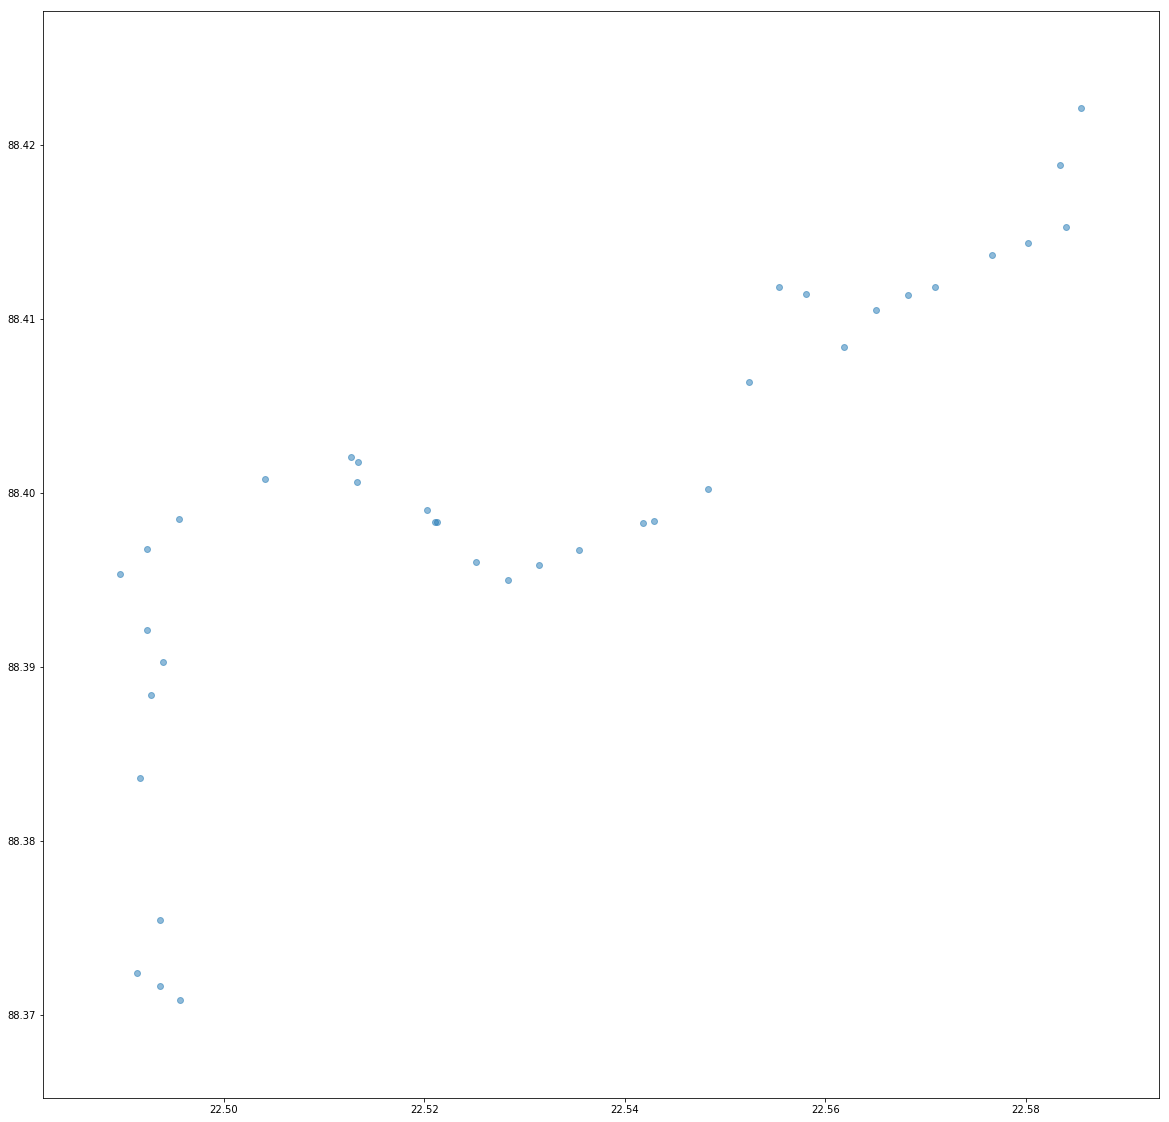

In [27]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.scatter(x, y, alpha=0.5)
# plt.axis([88.1,88.6,22.4,22.9])

In [11]:
routes.find_one({'routeShortName':'NS1:UP'})

{u'_id': ObjectId('5c4373108fdd0f4917b11cee'),
 u'agency': {u'agencyId': 9,
  u'agencyName': u'WBSTC',
  u'agencyTimezone': u'Asia/Kolkata',
  u'agencyType': u'PASSENGER_TRANSPORT'},
 u'endStop': u'AIRPORT (GATE NO.1)',
 u'hasPaths': True,
 u'isValid': u'Y',
 u'routeDepotList': [u'OTHER'],
 u'routeId': 5751,
 u'routeLongName': u'HOWRAH STATION - AIRPORT (GATE NO.1)',
 u'routeShortName': u'NS1:UP',
 u'routeType': 3,
 u'skipCount': 0,
 u'startStop': u'HOWRAH STATION'}

In [26]:
x=[]
y=[]
for s in graph.find_one({'routeCode':'AC9:UP'})['stops']:
    d=stop.find_one({'stopName':s})
    x.append(d['stopLat'])
    y.append(d['stopLon'])

In [25]:
for s in graph.find_one({'routeCode':'AC9:UP'})['stops']:
    print s

K B K C MORE
BUILDING MORE (BELEGHATA)
DHAPA MATH PUKUR
SANTOSHPUR LAKE
KARUNAMOYEE (SALT LAKE)
JADAVPUR (SULEKHA)
KPC HOSPITAL
SANTOSHPUR  BUS STAND
JADAVPUR UNIVERSITY (8B BUS STAND)
FE BLOCK (SALT LAKE)
VIP BAZAR
RUBY HOSPITAL
FD BLOCK
AJOY NAGAR
RUBY (GATEWAY HOTEL)
TAGORE PARK BUS STOP
CHINGRIGHATA (CAPTAIN BHERY)
GD ISLAND (SALT LAKE)
SANTOSHPUR
JORA BRIDGE (SANTOSHPUR)
KALIKAPUR
SURVEY PARK
METROPOLITAN
I A BLOCK
UTTAR PANCHANNA GRAM
MUKUNDAPUR
TAGORE PARK
RUBY
PANCHANNA GRAM
SCIENCE CITY MORE
BASANTI HIGH WAY XING
METRO CASH & CARRY
FD BLOCK (SALT LAKE)
SCIENCE CITY XING
TEGORE PARK
SALT LAKE STADIUM / AMRI
CHINGRIGHATA


In [4]:
mydb.list_collection_names()

[u'stops',
 u'positions',
 u'paths',
 u'graph',
 u'retarded_positions',
 u'liveloc',
 u'stop_con',
 u'vehicles',
 u'routes',
 u'stores',
 u'stop_and_wait']

In [5]:
stores=mydb['stores']

In [6]:
for s in stores.find():
    print s
    

{u'geometry': {u'type': u'Point', u'coordinates': [u'88.35182280000004', u'22.5602948']}, u'bus': [], u'_id': ObjectId('5ca9859a8fdd0f23efbf1d27'), u'store_id': 2, u'store': u'TJ LINDSAY3A HUMAYUN PALACE ( CITY MART ) KOLKATA -700087'}
{u'geometry': {u'type': u'Point', u'coordinates': [u'88.40092580033036', u'22.49405356437818']}, u'bus': [], u'_id': ObjectId('5ca9859a8fdd0f23efbf1d29'), u'store_id': 4, u'store': u'TJ MEDICA, MEDICA SUPERSPECIALTY HOSPITAL , 127 MUKUND PUR . E.M BYPASS, KOLKATA - 700099'}
{u'geometry': {u'type': u'Point', u'coordinates': [u'88.41427720000002', u'22.6136803']}, u'bus': [], u'_id': ObjectId('5ca9859a8fdd0f23efbf1d2c'), u'store_id': 7, u'store': u'TJ DCN MALL, DIAMOND CITY NORTH MALL, 68 JESSORE ROAD , SHOP NO FR 5&6 , 4TH FLOOR, PREMISES NO \u2013 1, KOLKATA \u2013 700 055'}
{u'geometry': {u'type': u'Point', u'coordinates': [u'88.35925539999994', u'22.5473972']}, u'bus': [], u'_id': ObjectId('5ca9859a8fdd0f23efbf1d2d'), u'store_id': 8, u'store': u'TJ BNW